In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

own_csv_path = ".\owid-covid-data.csv"

In [2]:
own_data = pd.read_csv(own_csv_path)
print(own_data.columns)
own_data.head()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
del own_data['new_cases_smoothed']
del own_data['new_deaths_smoothed']
del own_data['total_cases_per_million']
del own_data['new_cases_per_million']
del own_data['new_cases_smoothed_per_million']
del own_data['total_deaths_per_million']
del own_data['new_deaths_per_million']
del own_data['new_deaths_smoothed_per_million']
del own_data['total_tests']
del own_data['new_tests']
del own_data['total_tests_per_thousand']
del own_data['new_tests_per_thousand']
del own_data['new_tests_smoothed']
del own_data['new_tests_smoothed_per_thousand']
del own_data['tests_per_case']
del own_data['positive_rate']
del own_data['tests_units']
del own_data['stringency_index']
del own_data['population_density']
del own_data['median_age']
del own_data['aged_65_older']
del own_data['aged_70_older']
del own_data['gdp_per_capita']
del own_data['extreme_poverty']
del own_data['female_smokers']
del own_data['male_smokers']
del own_data['handwashing_facilities']
del own_data['hospital_beds_per_thousand']
del own_data['life_expectancy']
del own_data['human_development_index']
del own_data['iso_code']
own_data

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,cardiovasc_death_rate,diabetes_prevalence
0,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,0.0,38928341.0,597.029,9.59
1,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,0.0,38928341.0,597.029,9.59
2,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,0.0,38928341.0,597.029,9.59
3,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,38928341.0,597.029,9.59
4,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,38928341.0,597.029,9.59
...,...,...,...,...,...,...,...,...,...,...
50720,NaN,International,2020-10-13,696.0,NaN,7.0,NaN,NaN,NaN,NaN
50721,NaN,International,2020-10-14,696.0,NaN,7.0,NaN,NaN,NaN,NaN
50722,NaN,International,2020-10-15,696.0,NaN,7.0,NaN,NaN,NaN,NaN
50723,NaN,International,2020-10-16,696.0,NaN,7.0,NaN,NaN,NaN,NaN


In [4]:
index_names_to_drop = own_data[ (own_data['continent'] != 'Europe') & (own_data['continent'] != 'North America') ].index
own_data.drop(index_names_to_drop , inplace=True)
own_data.describe()

,total_cases,new_cases,total_deaths,new_deaths,population,cardiovasc_death_rate,diabetes_prevalence
count,1.951600e+04,21022.000000,15918.000000,21022.000000,2.121200e+04,16798.000000,18655.000000
mean,7.235811e+04,782.870992,4484.178163,26.925174,1.770568e+07,213.882625,8.053832
std,4.499052e+05,4341.334425,17835.605530,147.085243,4.588839e+07,107.534093,3.124553
min,1.000000e+00,-1385.000000,1.000000,-1918.000000,8.090000e+02,86.060000,2.160000
25%,9.600000e+01,0.000000,11.000000,0.000000,1.109470e+05,128.275000,5.460000
50%,1.564000e+03,10.000000,105.000000,0.000000,3.280815e+06,170.050000,7.370000
75%,1.767750e+04,189.000000,821.750000,4.000000,1.042306e+07,266.653000,10.180000
max,8.050141e+06,78427.000000,218599.000000,4928.000000,3.310026e+08,539.849000,17.110000


In [5]:
na_index_to_drop = own_data[ (own_data['date'] != '2020-10-17')].index
na_us_df = own_data.drop(na_index_to_drop , inplace=True)
own_data

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,cardiovasc_death_rate,diabetes_prevalence
514,Europe,Albania,2020-10-17,16501.0,289.0,443.0,4.0,2877800.0,304.195,10.08
1030,Europe,Andorra,2020-10-17,3377.0,187.0,59.0,0.0,77265.0,109.135,7.97
1445,North America,Anguilla,2020-10-17,3.0,0.0,NaN,0.0,15002.0,NaN,NaN
1657,North America,Antigua and Barbuda,2020-10-17,112.0,0.0,3.0,0.0,97928.0,191.511,13.17
2413,North America,Aruba,2020-10-17,4289.0,4.0,32.0,0.0,106766.0,NaN,11.62
...,...,...,...,...,...,...,...,...,...,...
47104,Europe,Ukraine,2020-10-17,287231.0,5992.0,5408.0,106.0,43733759.0,539.849,7.11
47688,Europe,United Kingdom,2020-10-17,689257.0,15635.0,43429.0,136.0,67886004.0,122.137,4.28
47980,North America,United States,2020-10-17,8050141.0,70256.0,218599.0,899.0,331002647.0,151.089,10.79
48188,North America,United States Virgin Islands,2020-10-17,1329.0,0.0,21.0,0.0,104423.0,273.670,12.26


In [33]:

na_total_deaths = own_data.loc[own_data['location'] == 'United States', 'total_deaths']
eu_total_deaths = own_data.loc[own_data['continent'] == 'Europe', 'total_deaths'].sum()
na_total_cases = own_data.loc[own_data['location'] == 'United States', 'total_cases']
eu_total_cases = own_data.loc[own_data['continent'] == 'Europe', 'total_cases'].sum()
eu_population = own_data.loc[own_data['continent'] == 'Europe', 'population'].sum()
na_population = own_data.loc[own_data['location'] == 'United States', 'population']


47980    218599.0
Name: total_deaths, dtype: float64

C:\Users\rrnap\anaconda3\envs\pydata\lib\site-packages\numpy\lib\stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
C:\Users\rrnap\anaconda3\envs\pydata\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


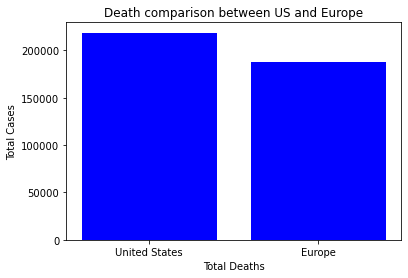

In [25]:
death_data = [na_total_deaths, eu_total_deaths]
x = ['United States', 'Europe']
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos,death_data, color='blue')
plt.xlabel("Total Deaths")
plt.ylabel("Total Cases")
plt.title("Death comparison between US and Europe")

plt.xticks(x_pos, x)

plt.show()